In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

In [20]:
SGP_df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
SGP_df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [21]:
SGP_df.head(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [22]:
SGP_df.tail(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [23]:
SGP_df.shape

(571, 43)

In [24]:
SGP_df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [25]:
SGP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [26]:
SGP_df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [27]:
SGP_df.isnull().sum().sum()

425

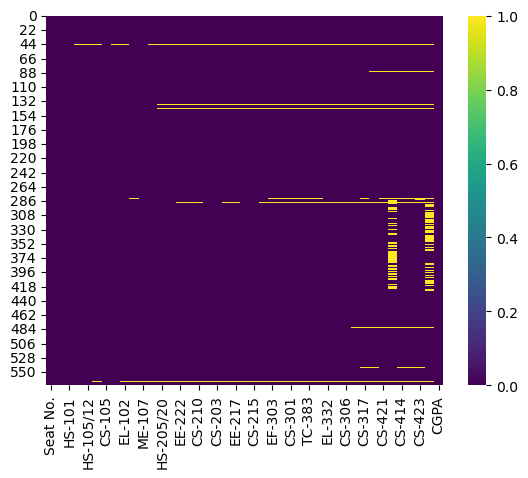

In [28]:
sns.heatmap(SGP_df.isnull(),cmap='viridis')
plt.show()

In [29]:
SGP_df.replace(np.nan,0, inplace = True)
SGP_df.head(15)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [30]:
SGP_df.isnull().sum().sum()

0

In [31]:
target = SGP_df[['CGPA']]
target.head()

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448


In [32]:
pd.unique(SGP_df['PH-121'])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [33]:
num_grades = {'B-':2.7,'A':4.0,'D':1.0,'A-':3.7,'B+':3.4,'B':3.0,'C+':2.4,'C':2.0,'C-':1.7,'D+':1.4,'WU':0.0,'A+':4.5,'F':0.0,'W':0,'I':0}

In [35]:
type(SGP_df)

pandas.core.frame.DataFrame

In [37]:
SGP_df = SGP_df.drop('Seat No.', axis = 1)

In [38]:
for items in SGP_df:
    SGP_df[items] = SGP_df[items].replace(num_grades)

SGP_df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


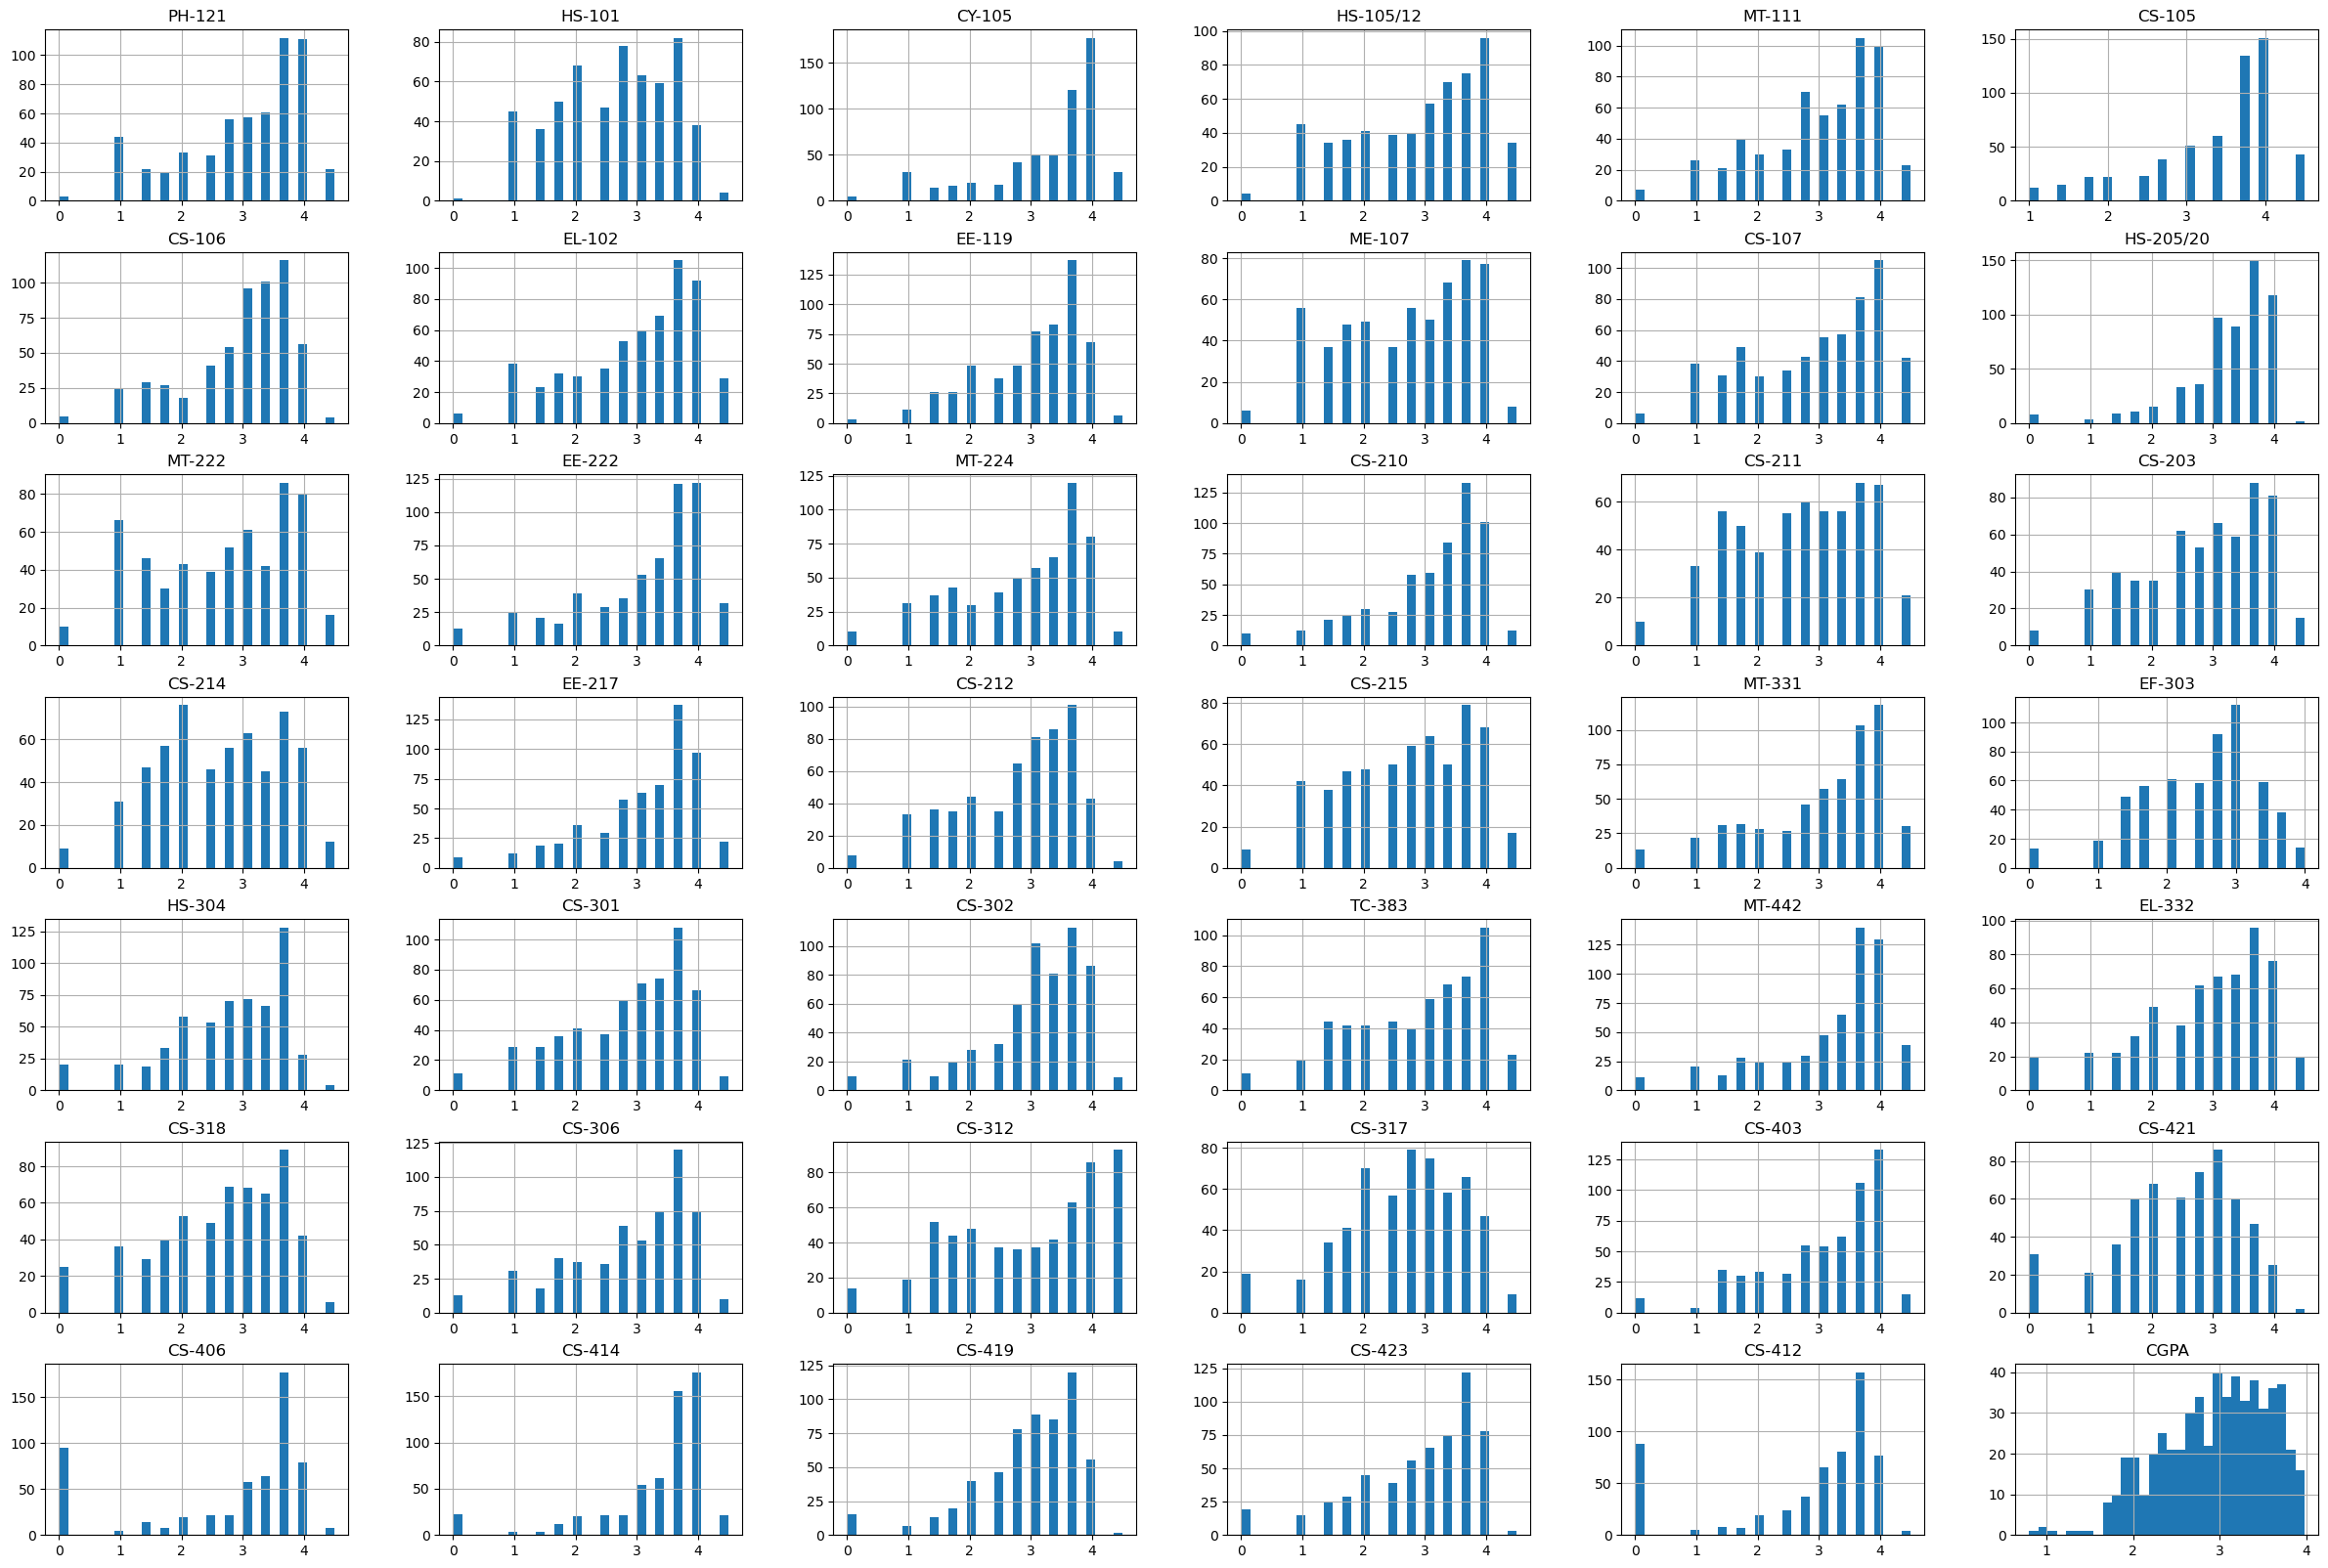

In [39]:
SGP_df.hist(bins = 30,figsize=(30,20))
plt.show()

<Axes: >

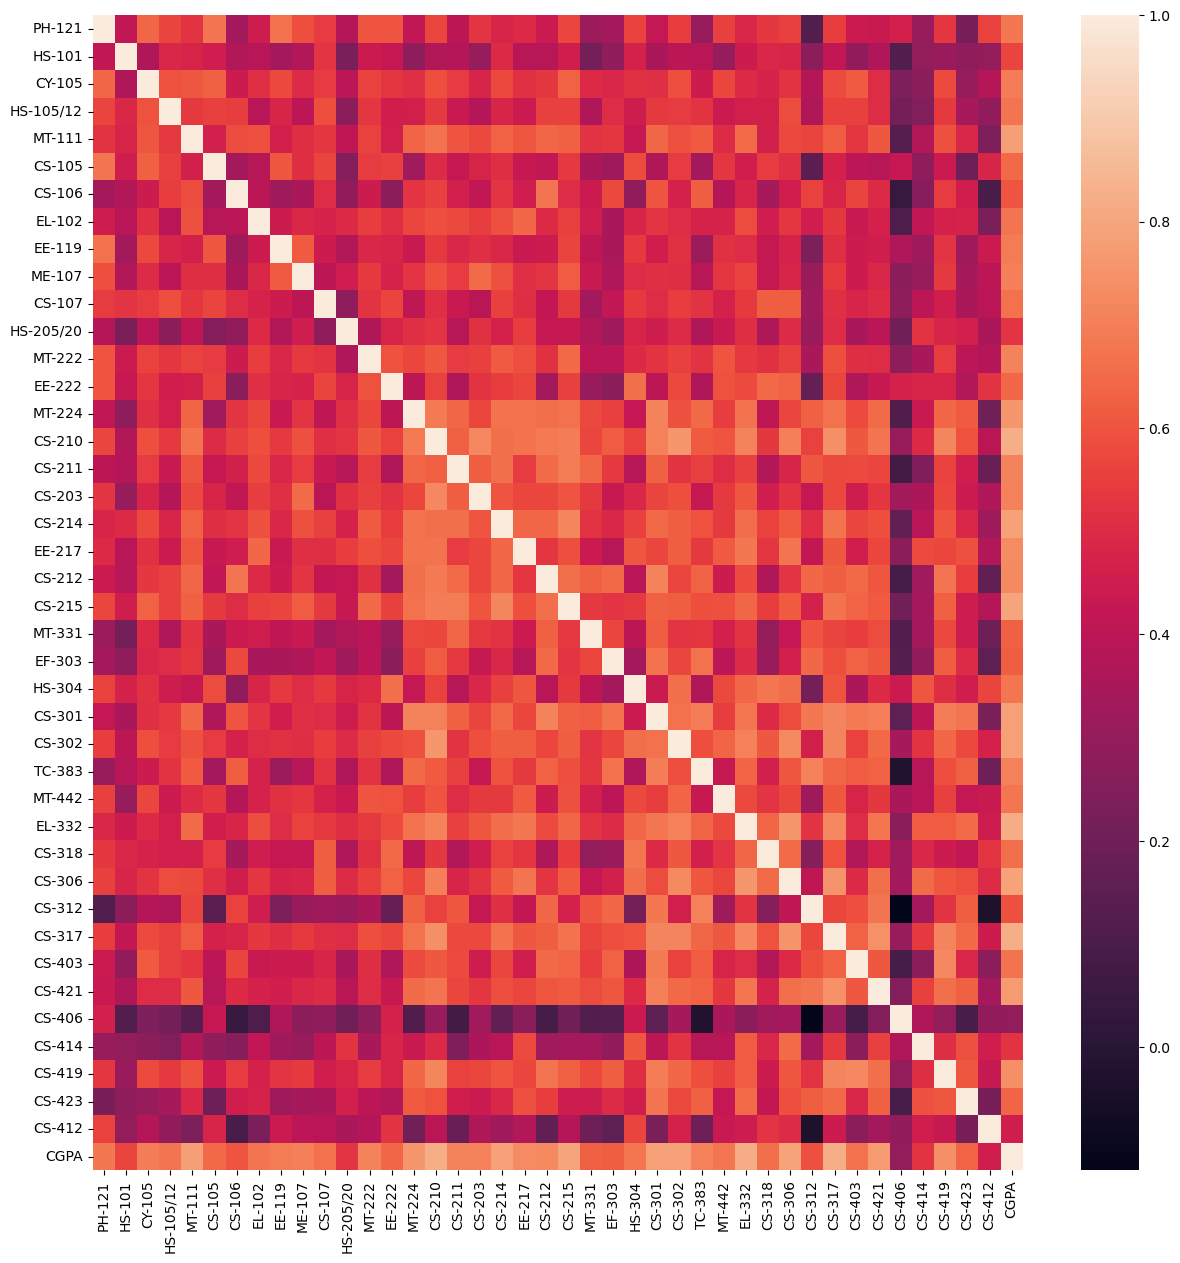

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(SGP_df.corr())

In [41]:
SGP_df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.00000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.037653,2.631874,3.289842,2.908757,3.008231,3.366900,2.965499,2.995271,3.025394,2.705604,...,2.97373,2.659019,3.081961,2.452715,2.779159,3.368126,2.965324,2.908932,2.797723,2.954888
std,0.995570,0.914637,0.960958,1.058148,0.980450,0.841286,0.874402,1.013987,0.847123,1.039823,...,1.18949,0.965584,0.972016,0.977181,1.401366,0.936248,0.864376,0.991087,1.342717,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.700000,2.000000,2.400000,3.000000,2.400000,2.400000,2.400000,1.700000,...,2.00000,2.000000,2.400000,1.700000,2.400000,3.000000,2.700000,2.400000,2.400000,2.538000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,3.00000,2.700000,3.400000,2.700000,3.400000,3.700000,3.000000,3.000000,3.400000,3.029000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,4.00000,3.400000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.451000
max,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,...,4.50000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,3.985000


In [42]:
SGP_df.to_csv('Cleaned_data.csv')

In [43]:
M1_columns = []
M2_columns = []
M3_columns = []
M4_columns = []

for items in [SGP_df]:
    for i in items:
        if i[3] == '1':
            M1_columns.append(i)
        elif i[3] =='2':
            M2_columns.append(i)
        elif i[3] =='3':
            M3_columns.append(i)
        else:
            M4_columns.append(i)

M2_columns = M1_columns + M2_columns
M3_columns = M2_columns + M3_columns
M4_columns = M3_columns + M4_columns

In [44]:
labels = SGP_df['CGPA'].values
features = SGP_df[list(M1_columns)].values

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30,random_state=3)

In [46]:
M1 = linear_model.LinearRegression()
M1.fit(X_train,Y_train)

LinearRegression()

In [47]:
Y_train_predict = M1.predict(X_train)
Y_test_predict = M1.predict(X_test)

In [48]:
input_M=[]
input_M.append([4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4])
print(input_M )
print(M1.predict(input_M ))

[[4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4]]
[1.9225149]


In [49]:
MSE_train = mean_squared_error(Y_train, Y_train_predict)
MAE_train = mean_absolute_error(Y_train, Y_train_predict)
print("The Model Performance for Training Set")
print('RMSE is {}'.format(np.sqrt(MSE_train)))
print('MAE is {}'.format(MAE_train))
print("_____________________________")


MSE_test = mean_squared_error(Y_test, Y_test_predict)
MAE_test = mean_absolute_error(Y_test, Y_test_predict)
print("The Model Performance for Testing Set")
print('RMSE is {}'.format(np.sqrt(MSE_test)))
print('MAE is {}'.format(MAE_test))
print("_____________________________")


test_score = M1.score(X_test, Y_test)
print('Model Score for Testing Set')
print('TEST SCORE {}'.format(test_score.round(2)))

The Model Performance for Training Set
RMSE is 0.22267954038593382
MAE is 0.17727259827342196
_____________________________
The Model Performance for Testing Set
RMSE is 0.25154242084673406
MAE is 0.18534891997400943
_____________________________
Model Score for Testing Set
TEST SCORE 0.84


In [50]:
compare = {'Actual': Y_test, 'Predict':Y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
0,3.540,2.911147
1,3.580,3.645547
2,3.765,3.592591
3,2.880,2.991799
4,1.886,2.436084
...,...,...
167,3.425,3.341286
168,2.236,2.293397
169,1.876,2.057328
170,3.266,3.281123


In [51]:
S = np.random.choice(X_test.shape[0])
print('Predicted CGPA : ', Y_test_predict[S])
print('Actual CGPA : ', Y_test[S])

Predicted CGPA :  3.1976619336323524
Actual CGPA :  3.229


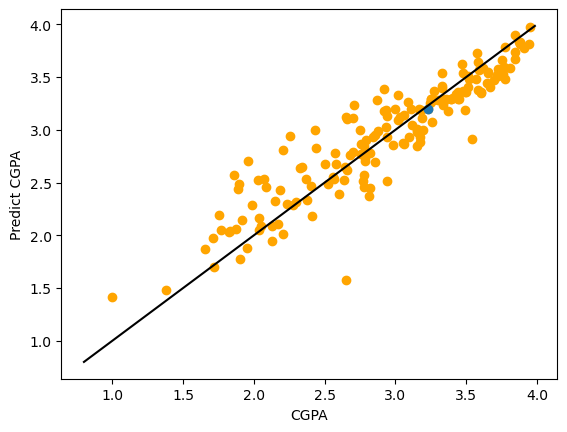

In [52]:
plt.scatter(Y_test, Y_test_predict, color = 'orange')
plt.scatter(Y_test[S], Y_test_predict[S])
plt.xlabel('CGPA')
plt.ylabel('Predict CGPA')
plt.plot([SGP_df['CGPA'].min(), SGP_df['CGPA'].max()],[SGP_df['CGPA'].min(), SGP_df['CGPA'].max()], color = 'black')
plt.show()

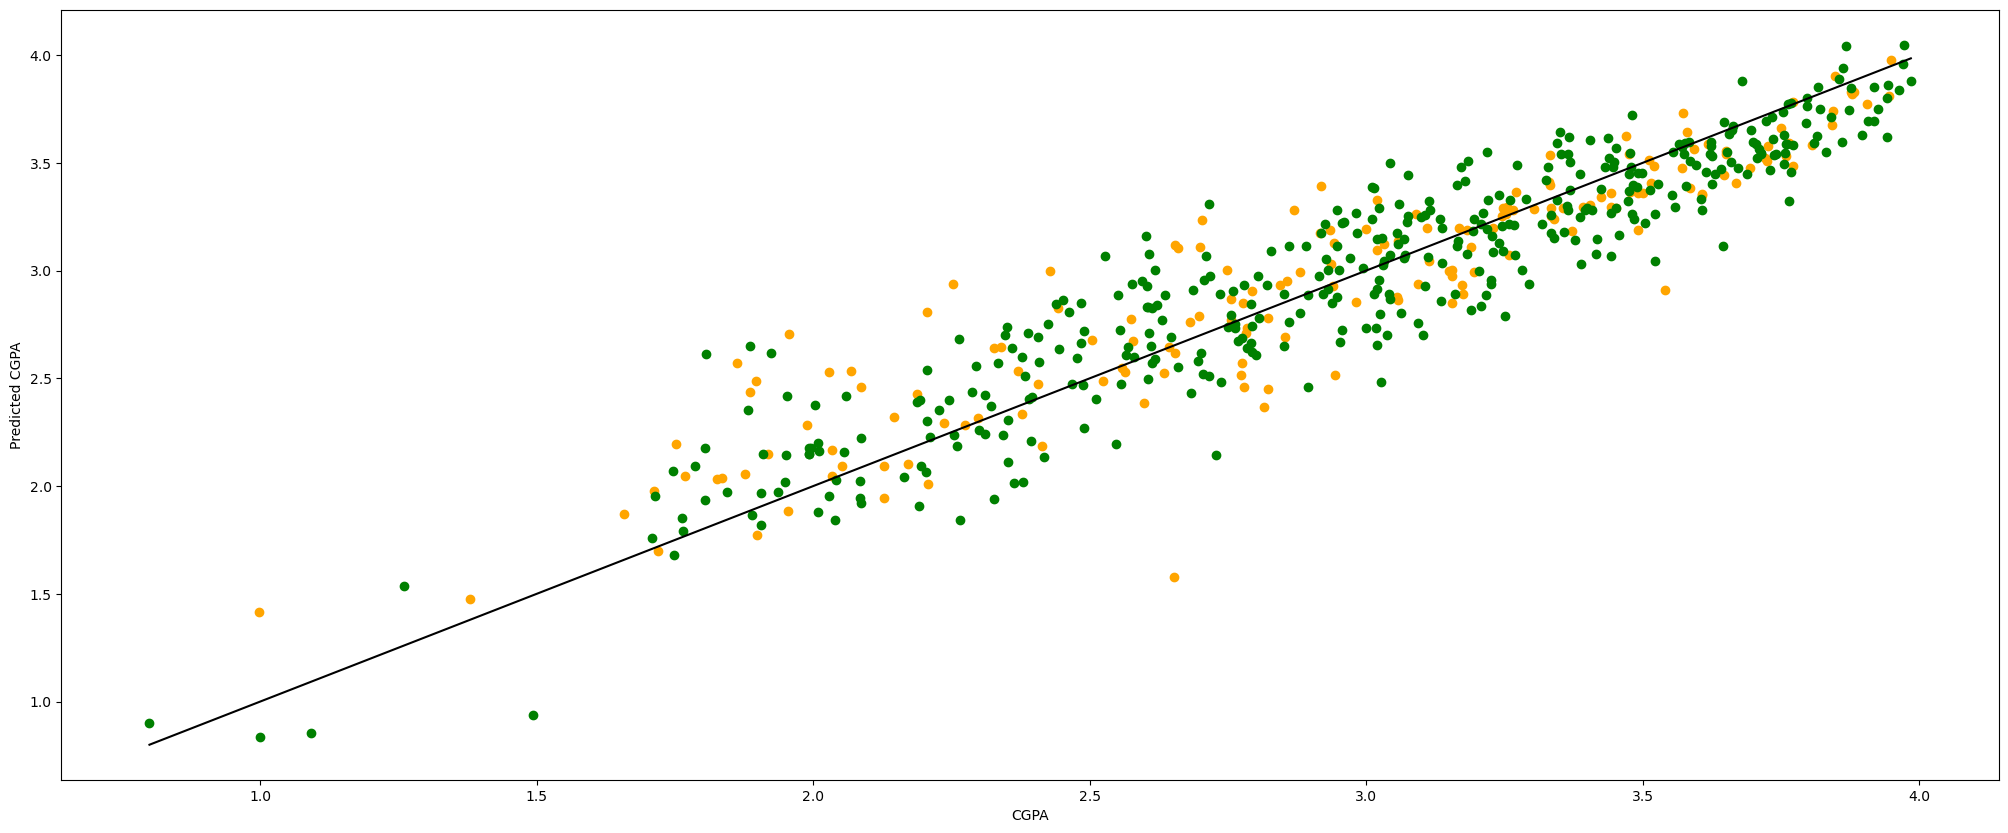

In [53]:
plt.figure(figsize = (25,10))
plt.scatter(Y_test, Y_test_predict, color = 'orange')
plt.scatter(Y_train, Y_train_predict, color = 'green')
plt.plot([SGP_df['CGPA'].min(), SGP_df['CGPA'].max()], [SGP_df['CGPA'].min(), SGP_df['CGPA'].max()], color='black')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

In [54]:
labels = SGP_df['CGPA'].values
features = SGP_df[list(M2_columns)].values

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30,random_state=3)

In [56]:
M2 = linear_model.LinearRegression()
M2.fit(X_train,Y_train)

LinearRegression()

In [57]:
Y_train_predict = M2.predict(X_train)
Y_test_predict = M2.predict(X_test)

In [58]:
MSE_train = mean_squared_error(Y_train, Y_train_predict)
MAE_train = mean_absolute_error(Y_train, Y_train_predict)
print("The Model Performance for Training Set")
print('RMSE is {}'.format(np.sqrt(MSE_train)))
print('MAE is {}'.format(MAE_train))
print("_____________________________")


MSE_test = mean_squared_error(Y_test, Y_test_predict)
MAE_test = mean_absolute_error(Y_test, Y_test_predict)
print("The Model Performance for Testing Set")
print('RMSE is {}'.format(np.sqrt(MSE_test)))
print('MAE is {}'.format(MAE_test))
print("_____________________________")


test_score = M2.score(X_test, Y_test)
print('Model Score for Testing Set')
print('TEST SCORE {}'.format(test_score.round(2)))

The Model Performance for Training Set
RMSE is 0.15402755624176237
MAE is 0.11056996260107892
_____________________________
The Model Performance for Testing Set
RMSE is 0.21432099579335456
MAE is 0.1353347587304361
_____________________________
Model Score for Testing Set
TEST SCORE 0.88


In [59]:
compare = {'Actual': Y_test, 'Predict':Y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
0,3.540,3.241882
1,3.580,3.663595
2,3.765,3.608933
3,2.880,2.912679
4,1.886,2.166997
...,...,...
167,3.425,3.335682
168,2.236,2.505991
169,1.876,2.019503
170,3.266,3.371031


In [60]:
T= np.random.choice(X_test.shape[0])
print('Predicted CGPA : ', Y_test_predict[T])
print('Actual CGPA : ', Y_test[T])

Predicted CGPA :  3.745409934247952
Actual CGPA :  3.772


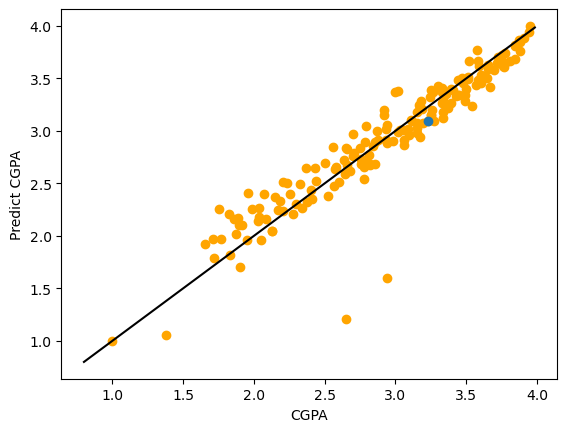

In [61]:
plt.scatter(Y_test, Y_test_predict, color = 'orange')
plt.scatter(Y_test[S], Y_test_predict[S])
plt.xlabel('CGPA')
plt.ylabel('Predict CGPA')
plt.plot([SGP_df['CGPA'].min(), SGP_df['CGPA'].max()],[SGP_df['CGPA'].min(), SGP_df['CGPA'].max()], color = 'black')
plt.show()

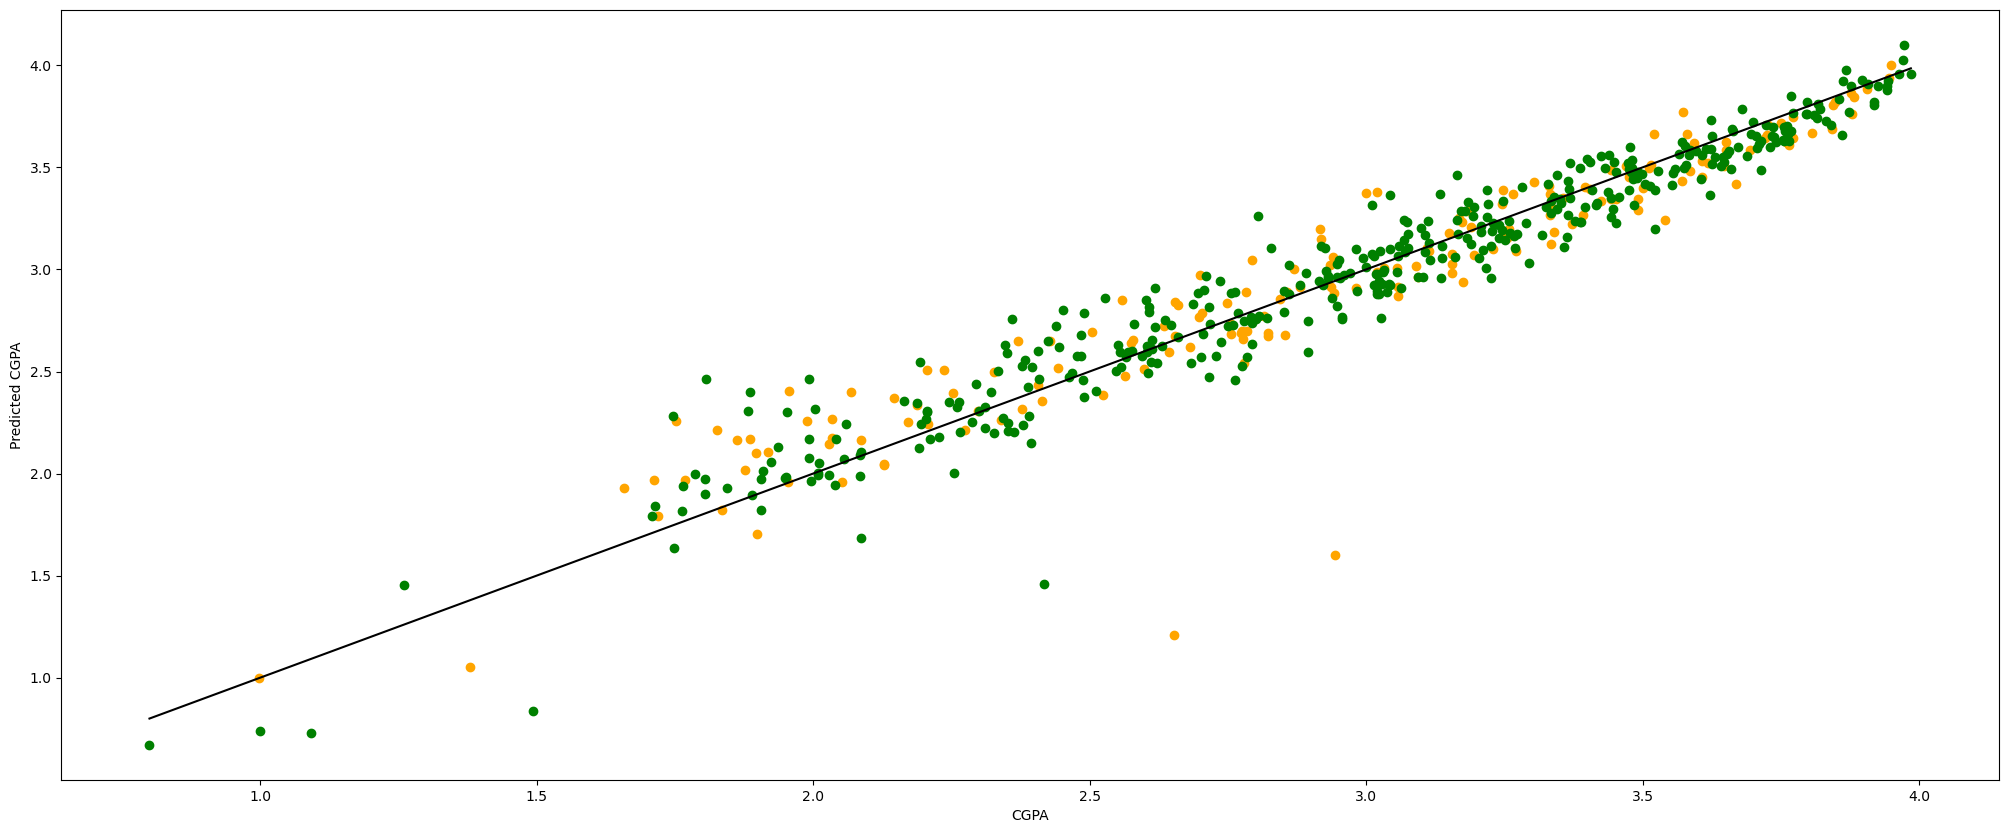

In [62]:
plt.figure(figsize = (25,10))
plt.scatter(Y_test, Y_test_predict, color = 'orange')
plt.scatter(Y_train, Y_train_predict, color = 'green')
plt.plot([SGP_df['CGPA'].min(), SGP_df['CGPA'].max()], [SGP_df['CGPA'].min(), SGP_df['CGPA'].max()], color='black')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

In [63]:
labels = SGP_df['CGPA'].values
features = SGP_df[list(M3_columns)].values

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30,random_state=3)

In [65]:
M3 = linear_model.LinearRegression()
M3.fit(X_train,Y_train)

LinearRegression()

In [66]:
Y_train_predict = M3.predict(X_train)
Y_test_predict = M3.predict(X_test)

In [67]:
MSE_train = mean_squared_error(Y_train, Y_train_predict)
MAE_train = mean_absolute_error(Y_train, Y_train_predict)
print("The Model Performance for Training Set")
print('RMSE is {}'.format(np.sqrt(MSE_train)))
print('MAE is {}'.format(MAE_train))
print("_____________________________")


MSE_test = mean_squared_error(Y_test, Y_test_predict)
MAE_test = mean_absolute_error(Y_test, Y_test_predict)
print("The Model Performance for Testing Set")
print('RMSE is {}'.format(np.sqrt(MSE_test)))
print('MAE is {}'.format(MAE_test))
print("_____________________________")


test_score = M3.score(X_test, Y_test)
print('Model Score for Testing Set')
print('TEST SCORE {}'.format(test_score.round(2)))

The Model Performance for Training Set
RMSE is 0.10508272247769326
MAE is 0.06853265351077344
_____________________________
The Model Performance for Testing Set
RMSE is 0.19764512319384334
MAE is 0.09755763867581693
_____________________________
Model Score for Testing Set
TEST SCORE 0.9


In [68]:
compare = {'Actual': Y_test, 'Predict':Y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
0,3.540,3.382930
1,3.580,3.630526
2,3.765,3.725386
3,2.880,2.778965
4,1.886,2.234918
...,...,...
167,3.425,3.344111
168,2.236,2.352284
169,1.876,1.808207
170,3.266,3.223034


In [69]:
U = np.random.choice(X_test.shape[0])
print('Predicted CGPA : ', Y_test_predict[U])
print('Actual CGPA : ', Y_test[U])

Predicted CGPA :  2.160823359580749
Actual CGPA :  2.171


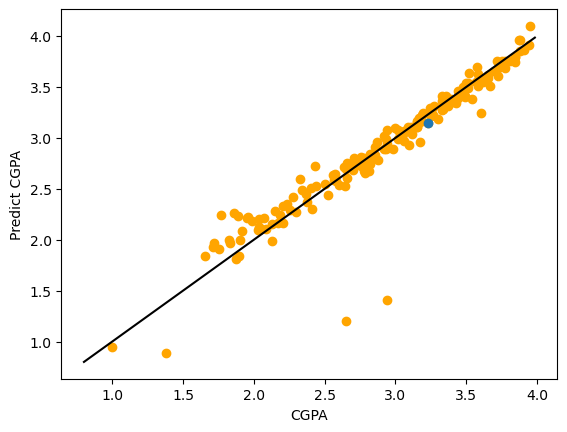

In [70]:
plt.scatter(Y_test, Y_test_predict, color = 'orange')
plt.scatter(Y_test[S], Y_test_predict[S])
plt.xlabel('CGPA')
plt.ylabel('Predict CGPA')
plt.plot([SGP_df['CGPA'].min(), SGP_df['CGPA'].max()],[SGP_df['CGPA'].min(), SGP_df['CGPA'].max()], color = 'black')
plt.show()

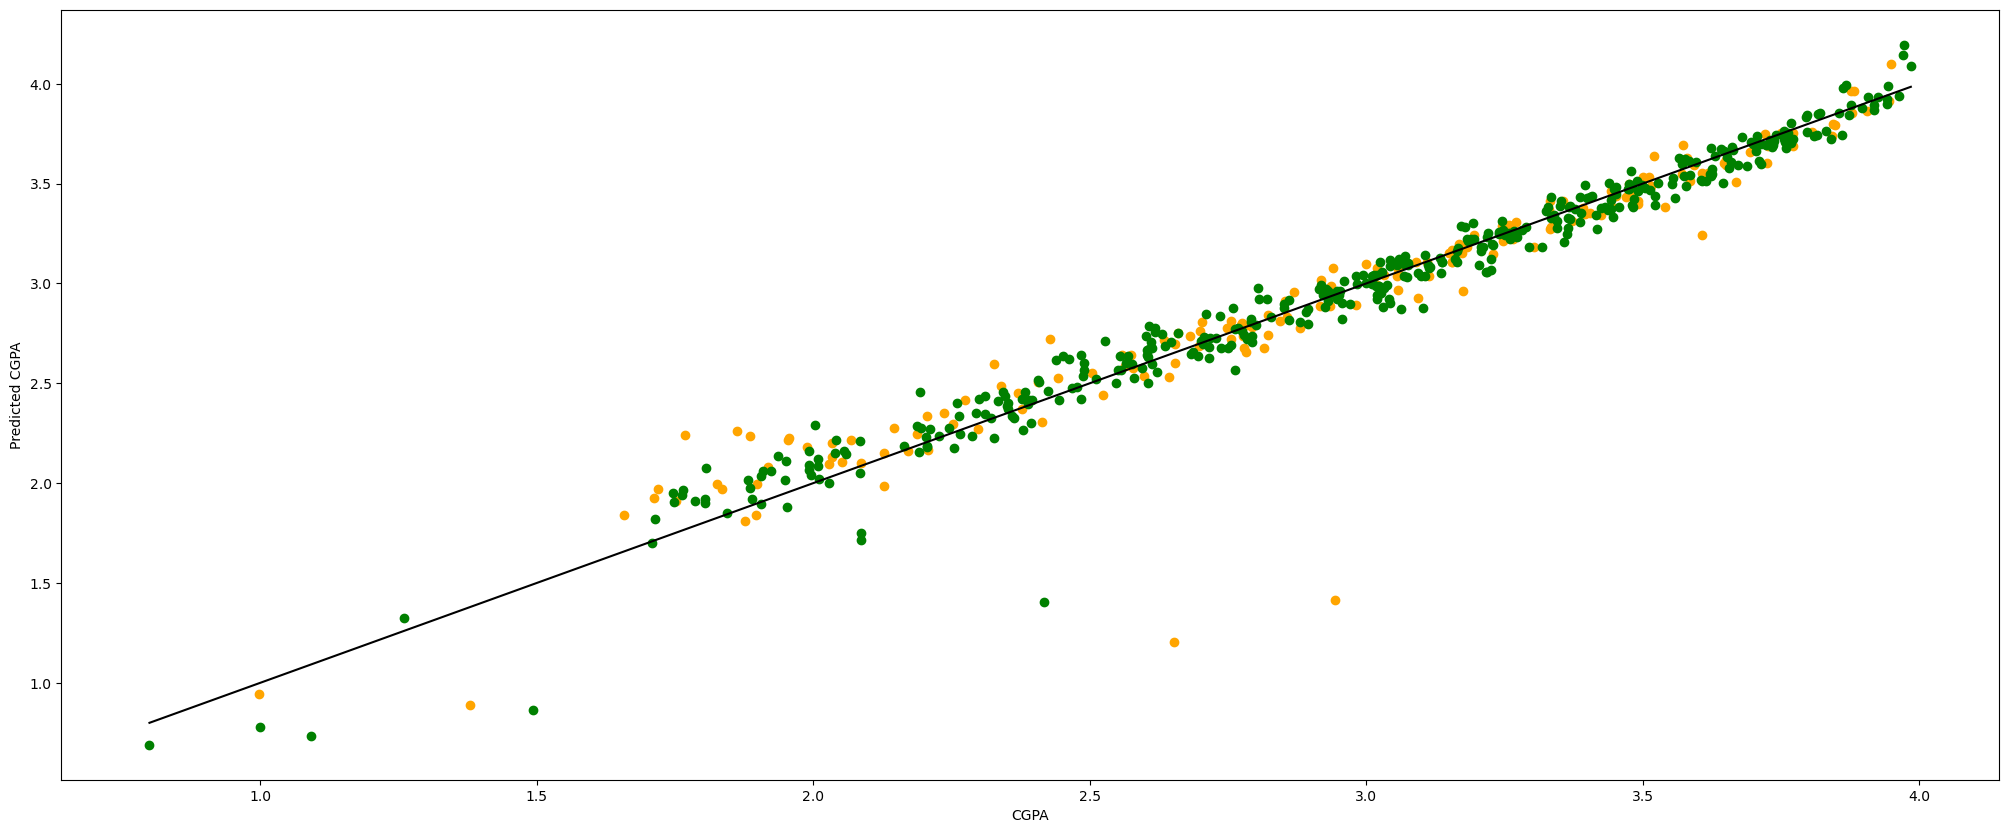

In [71]:
plt.figure(figsize = (25,10))
plt.scatter(Y_test, Y_test_predict, color = 'orange')
plt.scatter(Y_train, Y_train_predict, color = 'green')
plt.plot([SGP_df['CGPA'].min(), SGP_df['CGPA'].max()], [SGP_df['CGPA'].min(), SGP_df['CGPA'].max()], color='black')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

In [72]:
labels = SGP_df['CGPA'].values
features = SGP_df[list(M4_columns)].values

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30,random_state=3)

In [74]:
M4 = linear_model.LinearRegression()
M4.fit(X_train,Y_train)

LinearRegression()

In [75]:
Y_train_predict = M4.predict(X_train)
Y_test_predict = M4.predict(X_test)

In [76]:
MSE_train = mean_squared_error(Y_train, Y_train_predict)
MAE_train = mean_absolute_error(Y_train, Y_train_predict)
print("The Model Performance for Training Set")
print('RMSE is {}'.format(np.sqrt(MSE_train)))
print('MAE is {}'.format(MAE_train))
print("_____________________________")


MSE_test = mean_squared_error(Y_test, Y_test_predict)
MAE_test = mean_absolute_error(Y_test, Y_test_predict)
print("The Model Performance for Testing Set")
print('RMSE is {}'.format(np.sqrt(MSE_test)))
print('MAE is {}'.format(MAE_test))
print("_____________________________")


test_score = M4.score(X_test, Y_test)
print('Model Score for Testing Set')
print('TEST SCORE {}'.format(test_score.round(2)))

The Model Performance for Training Set
RMSE is 2.781766752215305e-15
MAE is 2.1597872474036253e-15
_____________________________
The Model Performance for Testing Set
RMSE is 2.985396900127834e-15
MAE is 2.306294690107956e-15
_____________________________
Model Score for Testing Set
TEST SCORE 1.0


In [77]:
compare = {'Actual': Y_test, 'Predict':Y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
0,3.540,3.540
1,3.580,3.580
2,3.765,3.765
3,2.880,2.880
4,1.886,1.886
...,...,...
167,3.425,3.425
168,2.236,2.236
169,1.876,1.876
170,3.266,3.266


In [78]:
V = np.random.choice(X_test.shape[0])
print('Predicted CGPA : ', Y_test_predict[V])
print('Actual CGPA : ', Y_test[V])

Predicted CGPA :  3.2540000000000004
Actual CGPA :  3.254


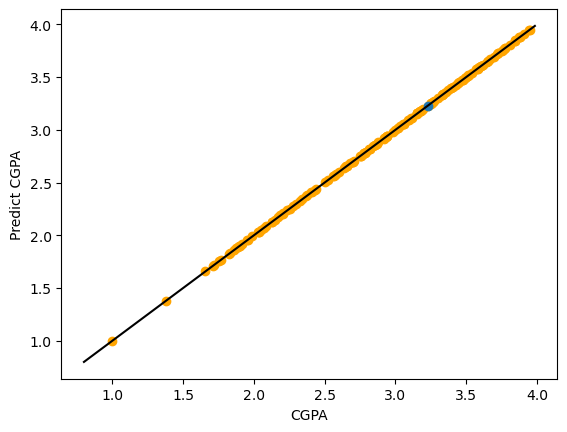

In [79]:
plt.scatter(Y_test, Y_test_predict, color = 'orange')
plt.scatter(Y_test[S], Y_test_predict[S])
plt.xlabel('CGPA')
plt.ylabel('Predict CGPA')
plt.plot([SGP_df['CGPA'].min(), SGP_df['CGPA'].max()],[SGP_df['CGPA'].min(), SGP_df['CGPA'].max()], color = 'black')
plt.show()

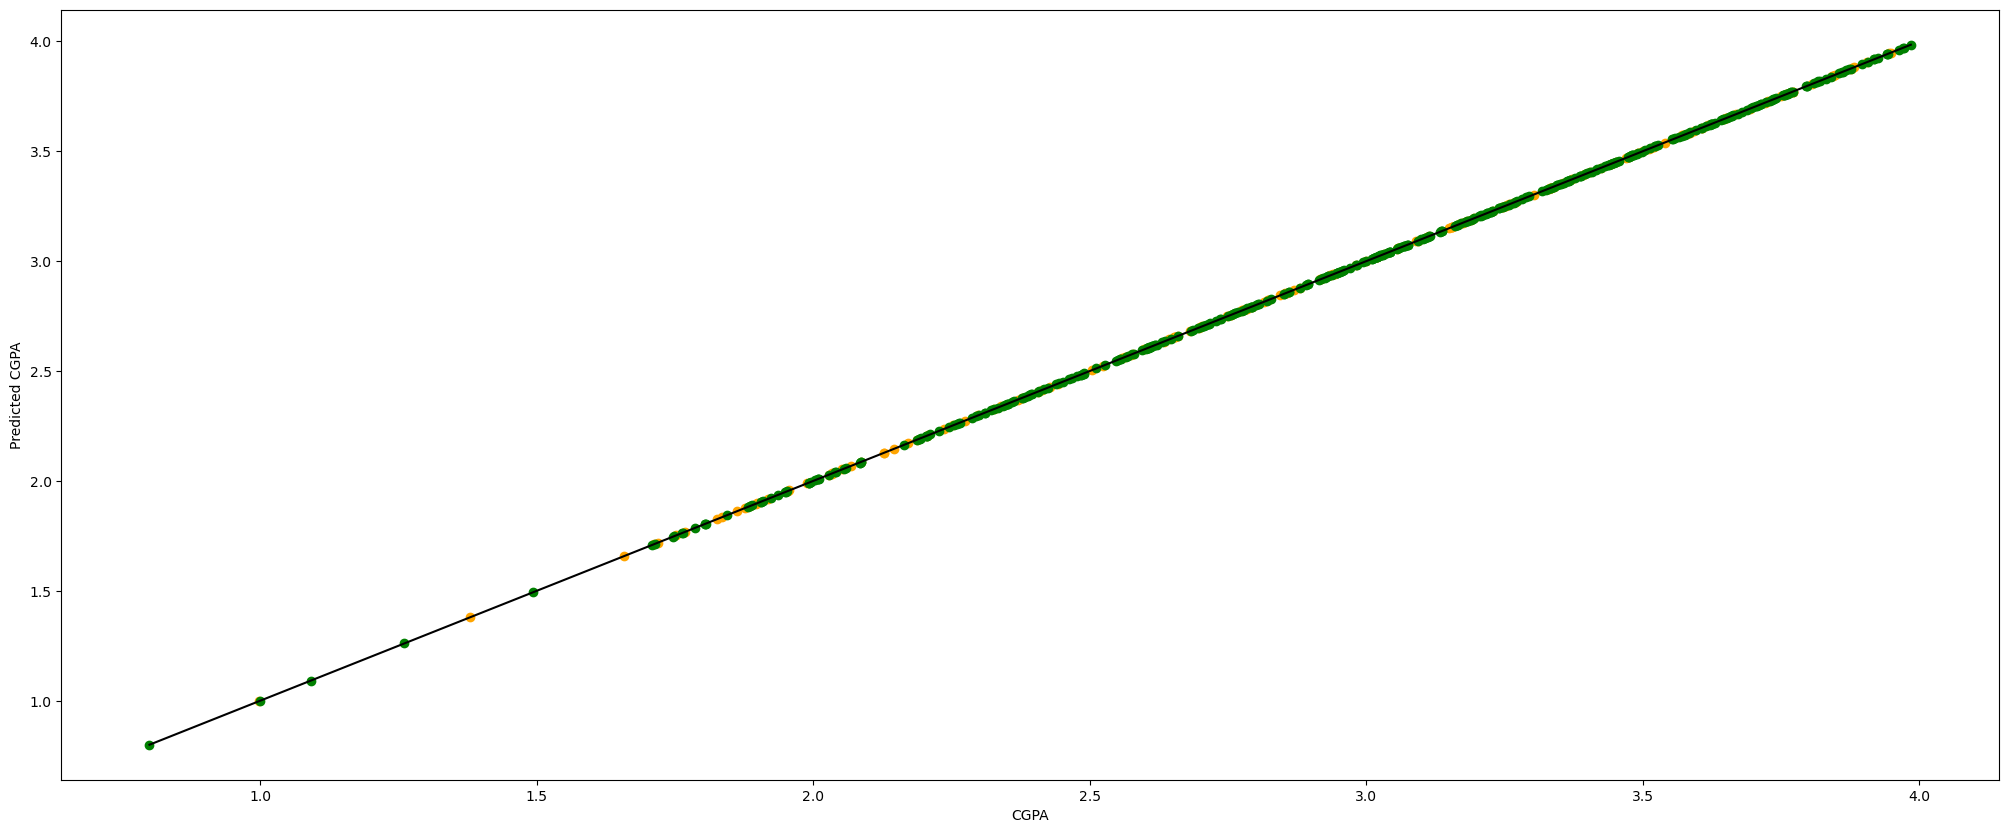

In [80]:
plt.figure(figsize = (25,10))
plt.scatter(Y_test, Y_test_predict, color = 'orange')
plt.scatter(Y_train, Y_train_predict, color = 'green')
plt.plot([SGP_df['CGPA'].min(), SGP_df['CGPA'].max()], [SGP_df['CGPA'].min(), SGP_df['CGPA'].max()], color='black')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

In [82]:
print("********************************************************")
print("*************HELLO FROM CGPA PREDICTOR******************")
print("********************************************************")
Model1=[]
Model2=[]
Model3=[]
Model4=[]
input_M=[]
Name = input ("What is your Name? ")
Model = int(input ("From which model would you like to predict your CGPA ? "))
if Model == 1:
  for val in M1_columns:
     string = "Enter your "+ val +" CGPA : "
     CGPA = input (string)
     if CGPA in num_grades.keys():
        Model1.append(num_grades[CGPA])
     else:
       Model1.append(0)
  input_M.append(Model1)
  print(f"{Name}, Your Predictive CGPA according to Linear Regression Algorithm is :{M1.predict(input_M)}")
elif Model == 2:
  for val in M2_columns:
     string = "Enter your "+ val +" CGPA : "
     CGPA = input (string)
     if CGPA in num_grades.keys():
        Model2.append(num_grades[CGPA])
     else:
       Model2.append(0)

  input_M.append(Model2)
  print(f"{Name}, Your Predictive CGPA according to Linear Regression Algorithm is :{M2.predict(input_M)}" )
elif Model == 3:
  for val in M3_columns:
     string = "Enter your "+ val +" CGPA : "
     CGPA = input (string)
     if CGPA in num_grades.keys():
        Model3.append(num_grades[CGPA])
     else:
       Model3.append(0)
  input_M.append(Model3)
  print(f"{Name}, Your Predictive CGPA according to Linear Regression Algorithm is : {M3.predict(input_M)}")
elif Model == 4:
  for val in M4_columns:
     string = "Enter your "+ val +" CGPA : "
     CGPA = input (string)
     if CGPA in num_grades.keys():
        Model4.append(num_grades[CGPA])
     else:
       Model4.append(0)
  input_M.append(Model4)
  print(f"{Name}, Your Predictive CGPA according to Linear Regression Algorithm is : {M4.predict(input_M)}")
else:
   print("KINDLY ENTER VALID VALUES")

print("HAVE A NICE DAY !!")




********************************************************
*************HELLO FROM CGPA PREDICTOR******************
********************************************************
What is your Name? AMEET
From which model would you like to predict your CGPA ? 1
Enter your PH-121 CGPA : A+
Enter your HS-101 CGPA : A
Enter your CY-105 CGPA : B+
Enter your HS-105/12 CGPA : A
Enter your MT-111 CGPA : B
Enter your CS-105 CGPA : C
Enter your CS-106 CGPA : C+
Enter your EL-102 CGPA : D
Enter your EE-119 CGPA : B
Enter your ME-107 CGPA : A+
Enter your CS-107 CGPA : A
AMEET, Your Predictive CGPA according to Linear Regression Algorithm is :[3.1032163]
HAVE A NICE DAY !!
